In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

file = pd.DataFrame(iris.data, columns=iris.feature_names)
file['target'] = iris.target
file['flower_name'] = file['target'].apply(lambda x : iris.target_names[x])

In [3]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
file['flower_name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

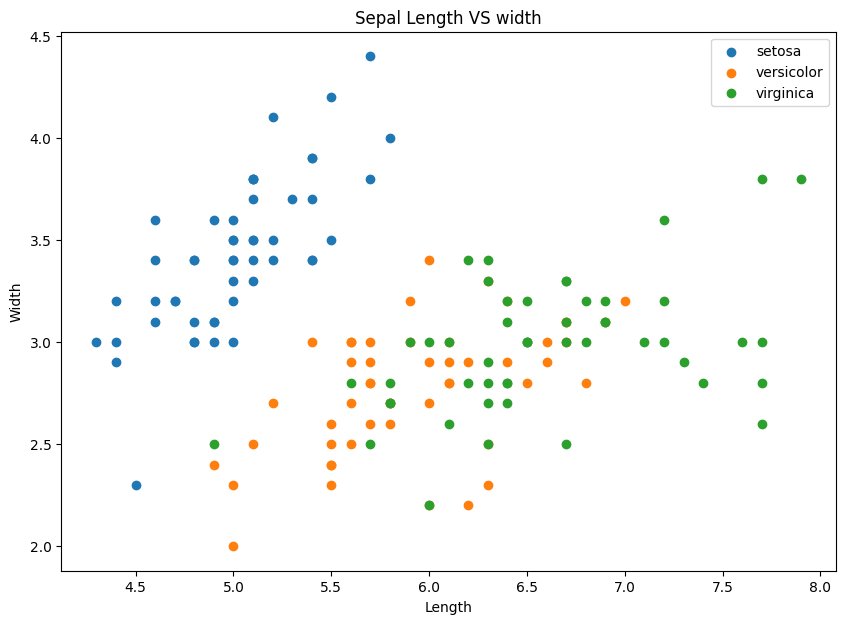

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))

df1 = file[file['target'] == 0]
df2 = file[file['target'] == 1]
df3 = file[file['target'] == 2]

ax.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], label='setosa')
ax.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], label='versicolor')
ax.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], label='virginica')
ax.set(
    title='Sepal Length VS width', 
    xlabel = 'Length', 
    ylabel = 'Width'
)
ax.legend()

KNN is used to take the K nearest neighbour of the data points and hence that can be used to predict the category of the required data point based on the data
 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
get_p = GridSearchCV(
    KNeighborsClassifier(), 
    {
        'n_neighbors' : [3,5,10], 
        'weights' : ['uniform', 'distance'], 
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    cv = 2, 
    return_train_score = False
)

X = file.drop(['target', 'flower_name'], axis=1)
y = file.target
get_p.fit(X, y)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']})

In [9]:
get_p.best_params_, get_p.best_score_

({'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'},
 0.9533333333333334)

In [10]:
model = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 10, weights = 'uniform')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [13]:
model.score(X_test, y_test)

0.9666666666666667

In [14]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  7]], dtype=int64)

<Axes: >

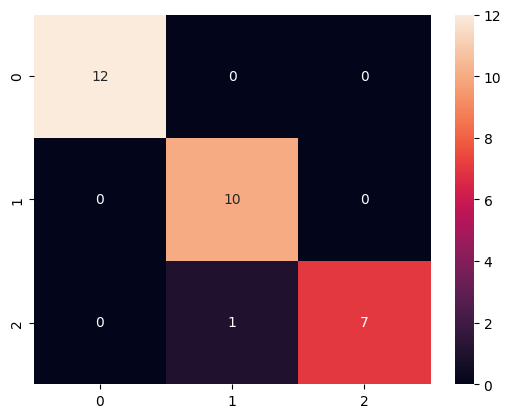

In [16]:
import seaborn as sns

sns.heatmap(cm, annot=True)